In [13]:
from sklearn.base import TransformerMixin
from nltk import word_tokenize
class NLTKBOW(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return [{word: True for word in word_tokenize(document)} for document in X]

Tranform the dict to Matrix
---

In [4]:
from sklearn.feature_extraction import DictVectorizer

In [5]:
from sklearn.naive_bayes import BernoulliNB

In [6]:
import os
input_filename  = os.path.join("Data", "twitter", "python_tweets.json")
labels_filename = os.path.join("Data", "twitter", "python_classes.json")

In [9]:
import json
tweets = []
with open(input_filename) as inf:
    for line in inf:
        if len(line.strip()) == 0:
            continue
        tweets.append(json.loads(line)['text'])
with open(labels_filename) as inf:
    labels = json.load(inf)

Build the pipeline for NLTKBOW, DictVectorizer, BernoulliNB
---

In [14]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('bag-of-wors', NLTKBOW()),
                    ('vectorizer', DictVectorizer()),
                    ('naive-bayes', BernoulliNB())
                    ])

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, tweets[:len(labels)], labels, scoring="f1")

In [16]:
import numpy as np
print("Score: {:.3f}".format(np.mean(scores)))

Score: 0.321


In [18]:
model = pipeline.fit(tweets[:len(labels)], labels)

In [30]:
nb = model.named_steps['naive-bayes']
nb.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [32]:
dv = model.named_steps['vectorizer']
for i, feature_index in enumerate(top_features):
    print(i, dv.feature_names_[feature_index],
         np.exp(feature_probabilities[1][feature_index]))

AttributeError: 'DictVectorizer' object has no attribute 'feature_name_'

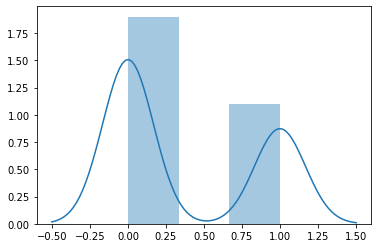

In [38]:
import seaborn as sns
sns.distplot(labels)

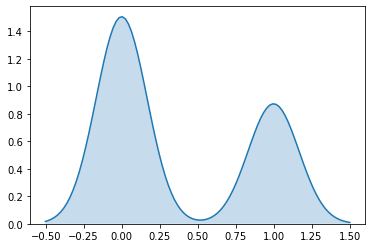

In [39]:
sns.kdeplot(data=labels, shade=True)

In [93]:
import hashlib  # hash 512 bits
fingerprints = []
t_encodes = []
for tweet in tweets[:len(labels)]:
    fingerprints.append(hashlib.md5(tweet.encode()).hexdigest())
# print(fingerprints)

199

In [79]:
# FingerPrints
md = "95b8c82b33b890c6633f54883bc53ca3"
def mmd(md):
    _encode = ''
    for i in range(2, int(len(md)/8)+1):
        s_1 = int(3*(i-1))
        s_2 = int(3*i)
        encode_ = int(md[s_1:s_2], 16) % 5
        _encode = _encode + str(encode_)
    return _encode

'312'

In [80]:
mmd("8ce27a2550062e442d6a8312e0a909ae")

'421'

In [94]:
for fp in fingerprints:
    t_encodes.append(int(mmd(fp)))
len(t_encodes)

199

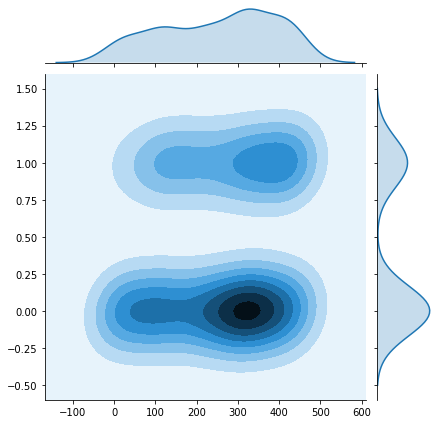

In [95]:
sns.jointplot(x=t_encodes, y=labels, kind="kde")

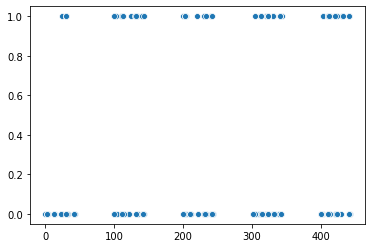

In [96]:
sns.scatterplot(x=t_encodes, y=labels)